# Hoja de Trabajo # 1
Jaime Mercar: 10007512

### Text Mining & Image Recognition

Librerías necesarias:

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from google.colab import drive 
import os

### Problema 1:

Desarrolle una función la cual reciba dos parámetros, una imagen y un entero llamado color, la
función debe devolver una imagen la cual tenga activos los canales de color según los siguientes
puntos:
* Si el parámetro color vale 1, la imagen debe mostrar activos únicamente el color azul.
* Si el parámetro color vale 2, la imagen debe mostrar activos únicamente el color verde.
* Si el parámetro color vale 3, la imagen debe mostrar activos únicamente el color rojo.
* Si el parámetro color vale 10, la imagen debe mostrar activos únicamente los colores rojo y
verde.
* Si el parámetro color vale 20, la imagen debe mostrar activos únicamente los colores verde y
* azul.
* Si el parámetro color vale 30, la imagen debe mostrar activos únicamente los colores azul y
rojo.

Se descarga una imagen:

In [2]:
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Text_Mining_&_Reco')

Mounted at /content/drive


In [27]:
!git init

Initialized empty Git repository in /content/drive/MyDrive/Text_Mining_&_Reco/.git/


In [28]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	Copia de Mapa Mental.drawio
	HSV.JPG
	TM2da_Clase.ipynb
	cerveza.jpg
	flor.jpg
	imagen1/
	imagen2_salida_gray_azul.jpg
	imagen2_salida_gray_rojo.jpg
	imagen2_salida_gray_verde.jpg
	img1.jpg
	lab1.ipynb
	maceta.jpg
	p.jpg
	perro/
	temp.jpg
	vmw.JPG

nothing added to commit but untracked files present (use "git add" to track)


In [ ]:
#from PIL import Image
#np_image = Image.open('/content/drive/MyDrive/Text_Mining_&_Reco/maceta.jpg')
#imagen_como_arreglo = np.array(np_image)
#np_image.resize((500,500))

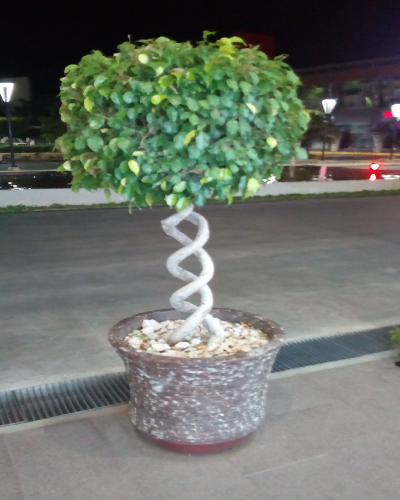

In [3]:
img = cv2.imread('/content/drive/MyDrive/Text_Mining_&_Reco/maceta.jpg')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(cv2.resize(img,(400,500)))

In [4]:
alto = img.shape[0]
ancho = img.shape[1]
print(img.shape)
print(alto)
print(ancho)

(3264, 1840, 3)
3264
1840


In [5]:
# accediendo a un píxel en particular
img[100,500]

array([7, 4, 6], dtype=uint8)

Creación de la función:

In [6]:
def color_change(image,color):
    alto = image.shape[0]
    ancho = image.shape[1]

    # lienzo donde caerá el resultado
    img_out = np.zeros((alto, ancho, 3))

    # se viaja por cada pixel
    for i in range(0,alto):
        for j in range(0, ancho):
            # asignación de pixel
            pixel = image[i,j]
            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]
            if color==1:
                img_out[i,j] = [0, 0, blue]
            elif color==2:
                img_out[i,j] = [0, green, 0]
            elif color==3:
                img_out[i,j] = [red, 0, 0]
            elif color==10:
                img_out[i,j] = [red, green, 0]
            elif color==20:
                img_out[i,j] = [0, green, blue]
            elif color==30:
                img_out[i,j] = [red, 0, blue]
            else:
                return print("Valores de color admitidos: [1,2,3,10,20,30]")


    # visualización de imagen
    # primero se debe pasar imagen a disco
    cv2.imwrite('temp.jpg', img_out)
    temp = cv2.imread('temp.jpg')
    
    return plt.imshow(temp)

Aplicando la función:

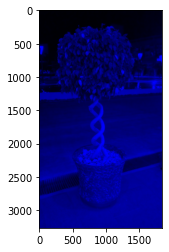

In [7]:
color_change(img,1)

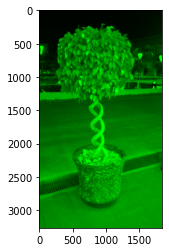

In [8]:
color_change(img,2)

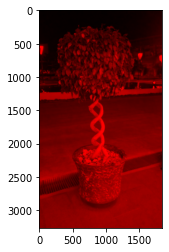

In [9]:
color_change(img,3)

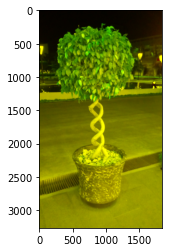

In [10]:
color_change(img,10)

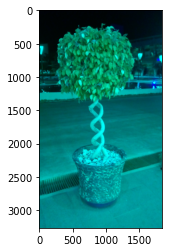

In [11]:
color_change(img,20)

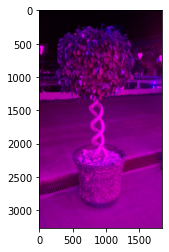

In [12]:
color_change(img,30)

### Problema 2:

En el .zip del laboratorio se le compartió un conjunto de imágenes en escala de grises, estas imágenes
fueron creadas utilizando una escala de grises en 3D, cree una función que dadas las 3 imágenes se
construya la imagen original a color.

In [13]:
img_R = cv2.imread('./perro/perro_salida_gray_rojo.jpg')
img_G = cv2.imread('./perro/perro_salida_gray_verde.jpg')
img_B = cv2.imread('./perro/perro_salida_gray_azul.jpg')

In [14]:
def three_gray_to_color(img_R,img_G,img_B):
    alto = img_R.shape[0]
    ancho = img_R.shape[1]

    # lienzo donde caerá el resultado
    img_out = np.zeros((alto, ancho, 3))

    # se viaja por cada pixel
    for i in range(0,alto):
        for j in range(0, ancho):
            # asignación de pixel
            red = img_R[i,j][0]
            green = img_G[i,j][0]
            blue = img_B[i,j][0]
            img_out[i,j] = [red, green, blue]

    # visualización de imagen
    # primero se debe pasar imagen a disco
    cv2.imwrite('temp.jpg', img_out)
    temp = cv2.imread('temp.jpg')
    
    return plt.imshow(temp)

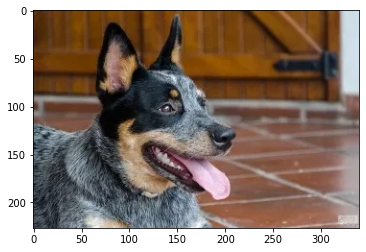

In [15]:
three_gray_to_color(img_R,img_G,img_B)

### Problema 3:

Cree una función que dada una imagen cree una escala de grises en tres dimensiones, tome en
cuenta que su función debe crear 3 imágenes como salida. Para entregar este ejercicio debe incluir
una las imágenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la
imagen del Problema #2.

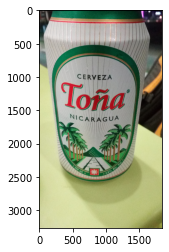

In [16]:
im = cv2.imread('cerveza.jpg')
# corrección de color BGR a RGB
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)

In [17]:
def color_to_3Dgray(im):
    alto = im.shape[0]
    ancho = im.shape[1]

    # lienzos donde caerán los resultados
    red_gray = np.zeros((alto, ancho, 3))
    green_gray = np.zeros((alto, ancho, 3))
    blue_gray = np.zeros((alto, ancho, 3))

    # se viaja por cada pixel
    for i in range(0,alto):
        for j in range(0, ancho):
            # asignación de pixel
            pixel = im[i,j]
            red = pixel[0]
            green = pixel[1]
            blue = pixel[2]
            red_gray[i,j] = [red, red, red]
            green_gray[i,j] = [green, green, green]
            blue_gray[i,j] = [blue, blue, blue]

    # visualización de imagen
    # primero se debe pasar imagen a disco
    cv2.imwrite('temp.jpg', red_gray)
    red = cv2.imread('temp.jpg')
    cv2.imwrite('temp.jpg', green_gray)
    green = cv2.imread('temp.jpg')
    cv2.imwrite('temp.jpg', blue_gray)
    blue = cv2.imread('temp.jpg')
    
    fig, (ax1, ax2, ax3) = plt.subplots(1,3)
    fig.set_size_inches(18.5, 10.5)
    ax1.imshow(red)
    ax1.set_xlabel('R', fontsize=30)
    ax2.imshow(green)
    ax2.set_xlabel('G', fontsize=30)
    ax3.imshow(blue)
    ax3.set_xlabel('B', fontsize=30)

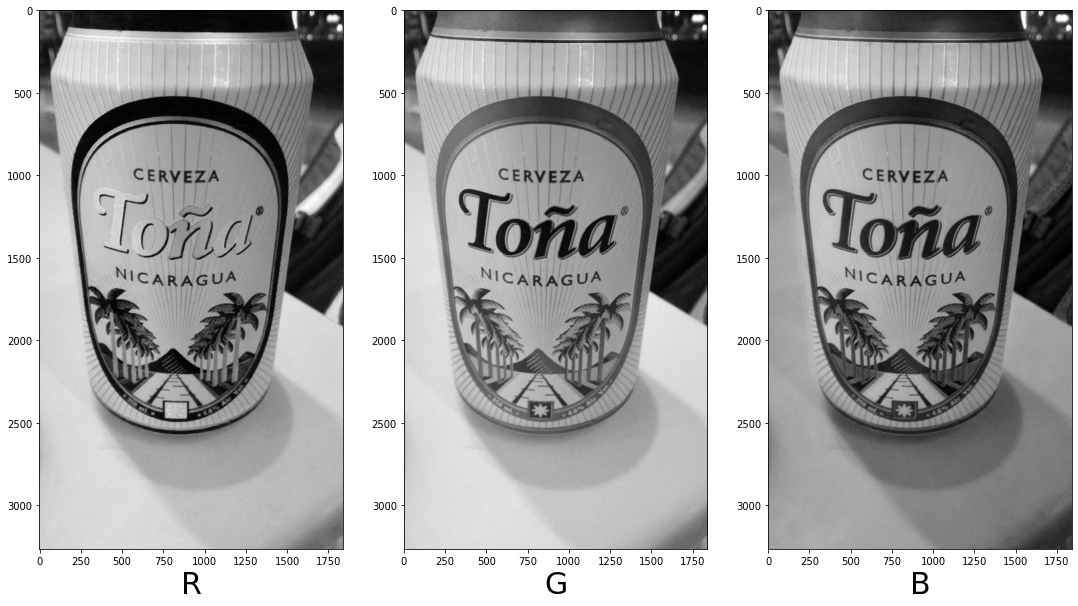

In [18]:
color_to_3Dgray(im)

Probamos la funcion con otra imagen en este caso la primer imagen

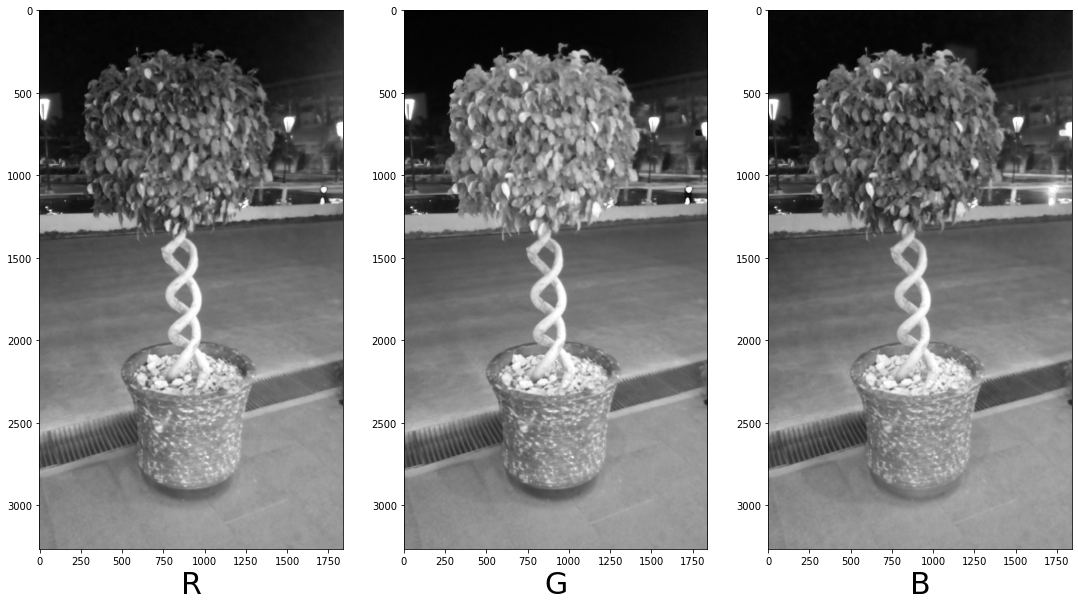

In [19]:
color_to_3Dgray(img)

### Problema 4:

Cree una función que dada una imagen, muestre el histograma de cada canal de color y el de
escala de grises (utilice un promedio aritmético para su escala de grises, no puede usar funciones
de opencv), sus histogramas deben incluir una línea vertical la cual muestre el valor de la media
de la distribución.

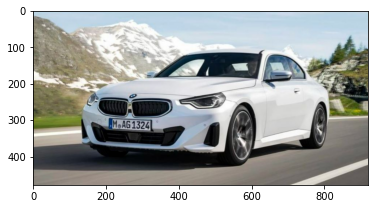

In [20]:
img = cv2.imread('vmw.JPG')
# corrección de color BGR a RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [21]:
import seaborn as sns

def img_to_hist(img):
    alto = img.shape[0]
    ancho = img.shape[1]
    
    red = list()
    green = list()
    blue = list()
    gray = list()

    # se viaja por cada pixel
    for i in range(0,alto):
        for j in range(0, ancho):
            # asignación de pixel
            pixel = img[i,j]
            red.append(pixel[0])
            green.append(pixel[1])
            blue.append(pixel[2])
            gray.append(np.mean(img[i,j]))
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 10))

    fig.suptitle('Histogramas de color')
    
    axes[0, 0].vlines(np.mean(red), 0,17500, color='black')
    axes[0, 1].vlines(np.mean(green), 0,25000, color='black')
    axes[1, 0].vlines(np.mean(blue), 0,22000, color='black')
    axes[1, 1].vlines(np.mean(gray), 0,13000, color='black')

    sns.histplot(ax=axes[0, 0], data=red, color = 'red')
    sns.histplot(ax=axes[0, 1], data=green, color = 'green')
    sns.histplot(ax=axes[1, 0], data=blue, color = 'blue')
    sns.histplot(ax=axes[1, 1], data=gray, color = 'gray')

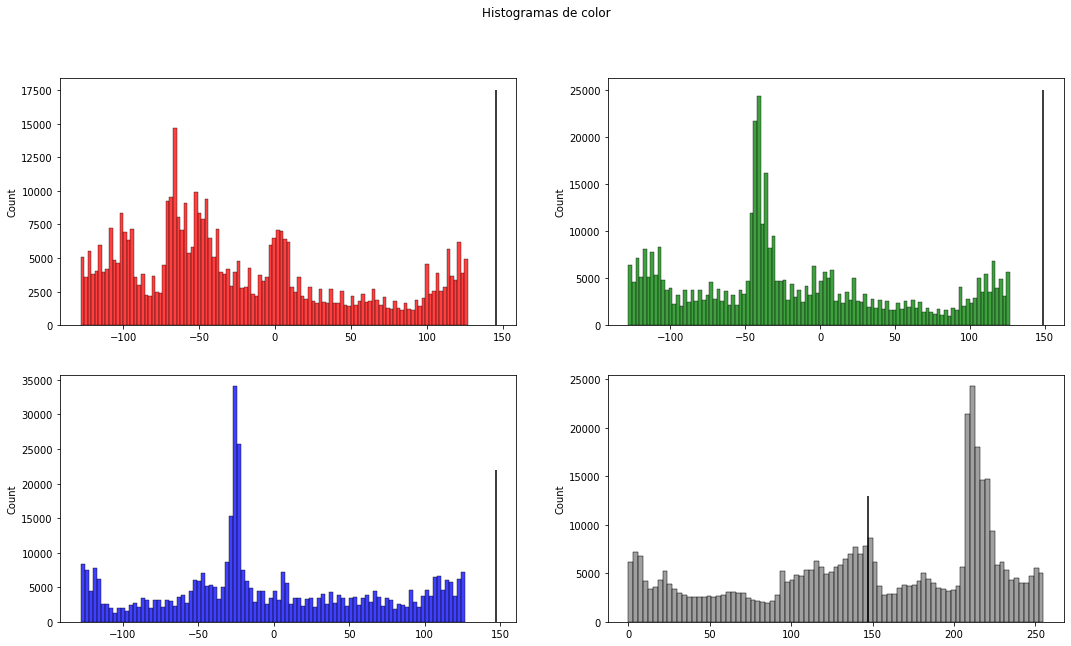

In [22]:
img_to_hist(img)

### Problema 5:

Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una
función que dada una imagen, realice una escala de grises ponderada (notar que no existe una
solución única).

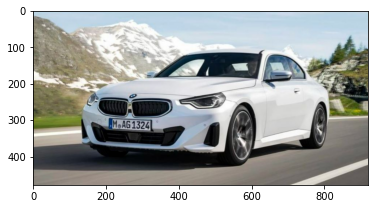

In [23]:
img = cv2.imread('vmw.JPG')
# corrección de color BGR a RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [24]:
def weighted_gray(img):    
    alto = img.shape[0]
    ancho = img.shape[1]

    # lienzo donde caerá el resultado
    img_out = np.zeros((alto, ancho, 1))

    # se viaja por cada pixel
    for i in range(0,alto):
        for j in range(0, ancho):
            # asignación de pixel
            pixel = img[i,j]
            img_out[i,j] = int(0.299*pixel[2]+0.587*pixel[1]+0.114*pixel[0])
            
    # visualización de imagen
    # primero se debe pasar imagen a disco
    cv2.imwrite('temp.jpg', img_out)
    temp = cv2.imread('temp.jpg')
    
    return plt.imshow(temp)

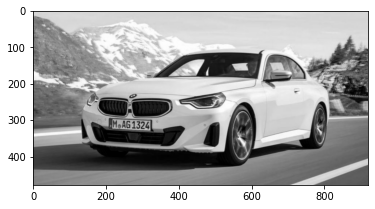

In [25]:
weighted_gray(img)

### Problema 6:

Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho
espacio, para entregar este ejercicio puede hacerlo por medio de Markdown en el mismo Notebook
donde trabajo los demas ejercicios.

El VHS está más cerca de cómo los humanos perciben el color. Tiene tres componentes: tono, saturación y valor. Este espacio de color describe los colores (tono o tinte) en términos de su tono (saturación o cantidad de gris) y su valor de brillo.

Es común que deseemos elegir un color adecuado para alguna de nuestras aplicaciones, cuando es así resulta muy útil usar la ruleta de color HSV. En ella el matiz se representa por una región circular; una región triangular separada, puede ser usada para representar la saturación y el valor del color. Normalmente, el eje horizontal del triángulo denota la saturación, mientras que el eje vertical corresponde al valor del color. De este modo, un color puede ser elegido al tomar primero el matiz de una región circular, y después seleccionar la saturación y el valor del color deseados de la región triangular.

En la siguiente imagen se muestra cómo se mapea este modelo de color con un cilindro:

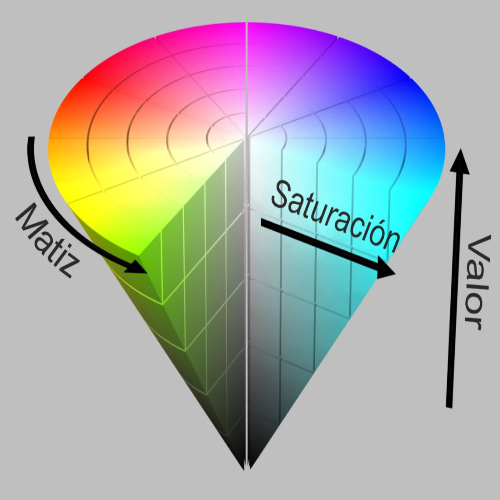

In [26]:
imge = cv2.imread('/content/drive/MyDrive/Text_Mining_&_Reco/HSV.JPG')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(cv2.resize(imge,(500,500)))